PARTB - The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights. You are expected to do the Market Risk Analysis using Python.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics
from scipy.stats import norm 

import warnings
warnings.filterwarnings("ignore")

In [58]:
MRD = pd.read_csv("/Users/happyfamily/Downloads/download-32.csv")

In [59]:
MRD.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [60]:
#Fixing the messy columns
MRD.columns = MRD.columns.str.replace(' ','')

In [61]:
MRD.head()

,Date,Infosys,IndianHotel,Mahindra&Mahindra,AxisBank,SAIL,ShreeCement,SunPharma,JindalSteel,IdeaVodafone,JetAirways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [62]:
MRD.tail()

,Date,Infosys,IndianHotel,Mahindra&Mahindra,AxisBank,SAIL,ShreeCement,SunPharma,JindalSteel,IdeaVodafone,JetAirways
309,02-03-2020,729,120,469,658,33,23110,401,146,3,22
310,09-03-2020,634,114,427,569,30,21308,384,121,6,18
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14
313,30-03-2020,633,75,284,379,23,17546,352,82,3,14


In [63]:
MRD['Date'].unique()

array(['31-03-2014', '07-04-2014', '14-04-2014', '21-04-2014',
       '28-04-2014', '05-05-2014', '12-05-2014', '19-05-2014',
       '26-05-2014', '02-06-2014', '09-06-2014', '16-06-2014',
       '23-06-2014', '30-06-2014', '07-07-2014', '14-07-2014',
       '21-07-2014', '28-07-2014', '04-08-2014', '11-08-2014',
       '18-08-2014', '25-08-2014', '01-09-2014', '08-09-2014',
       '15-09-2014', '22-09-2014', '29-09-2014', '06-10-2014',
       '13-10-2014', '20-10-2014', '27-10-2014', '03-11-2014',
       '10-11-2014', '17-11-2014', '24-11-2014', '01-12-2014',
       '08-12-2014', '15-12-2014', '22-12-2014', '29-12-2014',
       '05-01-2015', '12-01-2015', '19-01-2015', '26-01-2015',
       '02-02-2015', '09-02-2015', '16-02-2015', '23-02-2015',
       '02-03-2015', '09-03-2015', '16-03-2015', '23-03-2015',
       '30-03-2015', '06-04-2015', '13-04-2015', '20-04-2015',
       '27-04-2015', '04-05-2015', '11-05-2015', '18-05-2015',
       '25-05-2015', '01-06-2015', '08-06-2015', '15-06

In [64]:
#To know the number of rows and columns
print('The number of rows (observations) is',MRD.shape[0],'\n''The number of columns (variables) is',MRD.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [65]:
MRD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               314 non-null    object
 1   Infosys            314 non-null    int64 
 2   IndianHotel        314 non-null    int64 
 3   Mahindra&Mahindra  314 non-null    int64 
 4   AxisBank           314 non-null    int64 
 5   SAIL               314 non-null    int64 
 6   ShreeCement        314 non-null    int64 
 7   SunPharma          314 non-null    int64 
 8   JindalSteel        314 non-null    int64 
 9   IdeaVodafone       314 non-null    int64 
 10  JetAirways         314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [66]:
#PART B: Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference

In [67]:
#Changing the format of 'Date' column from object to Timeframe
MRD['Date'] = [pd.to_datetime(d) for d in MRD['Date']]

Text(0.5, 1.0, 'MRD Infosys Stock Price 1/1/14 - 10/2/20')

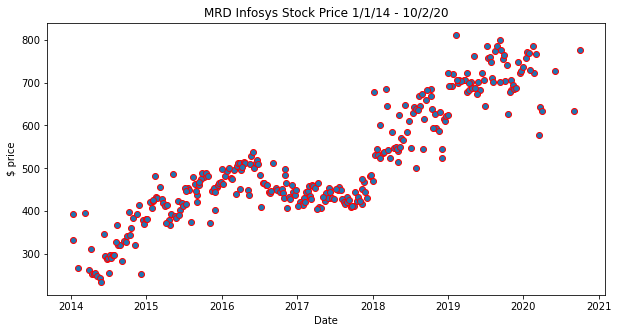

In [69]:
plt.figure(figsize=(10,5))
plt.scatter(MRD['Date'], MRD['Infosys'], edgecolors='r')
#plt.plot(stock_prices.index, MRD['Infosys'])
plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("MRD Infosys Stock Price 1/1/14 - 10/2/20")

Text(0.5, 1.0, 'MRD ShreeCement Stock Price 1/1/14 - 10/2/20')

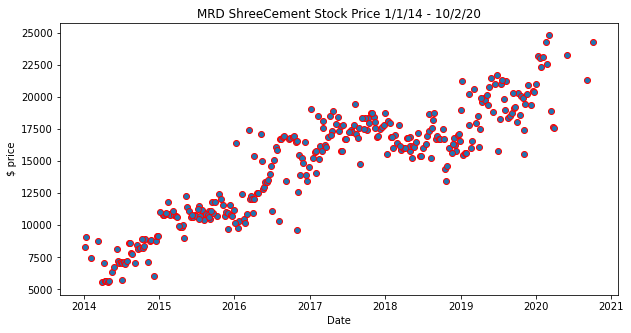

In [70]:
plt.figure(figsize=(10,5))
plt.scatter(MRD['Date'], MRD['ShreeCement'], edgecolors='r')
#plt.plot(stock_prices.index, MRD['Infosys'])
plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("MRD ShreeCement Stock Price 1/1/14 - 10/2/20")

The stock price for infosys has started from 300 in the 2014 and gone for a max of 800 in 2020/2021.
We could see a steady increase in the stock price starting from 2014 till mid of 2016.
After that there is slight decline in the price amount from end of 2016 till 2018.
The price has a low of close to 400 and then recovered steadly to reach the max level.

Text(0.5, 1.0, 'MRD SAIL Stock Price 1/1/14 - 10/2/20')

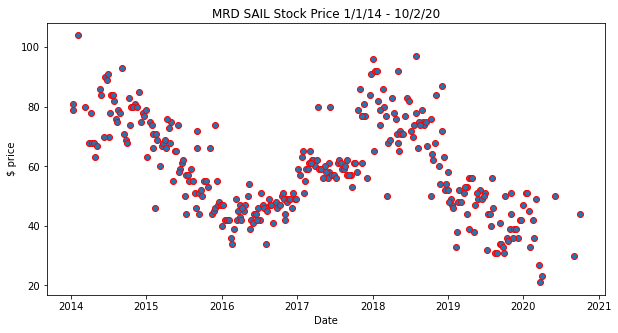

In [71]:
plt.figure(figsize=(10,5))
plt.scatter(MRD['Date'], MRD['SAIL'], edgecolors='r')
#plt.plot(stock_prices.index, MRD['Infosys'])
plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("MRD SAIL Stock Price 1/1/14 - 10/2/20")

This is a completely different scenario where the stock price for SAIL at 2014 was at it peak of 100.
Then the downward graph shows that the stock price has got to 40 by 2016(approx).
After a steady increase or recovery again from mid of 2018 the price of each stock has gone to complete low of 20

In [72]:
#PART B: Calculate Returns for all stocks with inference

In [73]:
#Using Log method for calculating the returns

In [74]:
MRD_returns = np.log(MRD.drop(['Date','Date'],axis=1)).diff(axis = 0, periods = 1)

In [75]:
MRD_returns.shape

(314, 10)

In [76]:
MRD_returns

,Infosys,IndianHotel,Mahindra&Mahindra,AxisBank,SAIL,ShreeCement,SunPharma,JindalSteel,IdeaVodafone,JetAirways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846
...,...,...,...,...,...,...,...,...,...,...
309,0.009649,-0.110348,0.030305,-0.057580,-0.087011,0.023688,0.072383,-0.053346,-0.287682,-0.127833
310,-0.139625,-0.051293,-0.093819,-0.145324,-0.095310,-0.081183,-0.043319,-0.187816,0.693147,-0.200671
311,-0.094207,-0.236389,-0.285343,-0.284757,-0.105361,-0.119709,-0.050745,-0.141830,-0.693147,-0.117783
312,0.109856,-0.182322,-0.091269,-0.173019,-0.251314,-0.067732,-0.076851,-0.165324,0.000000,-0.133531


In [77]:
#we can see that first row values are NaN as it does not have a previous value.
#Following that we have got the returns for all other stocks.

In [78]:
#PART B: Calculate Stock Means and Standard Deviation for all stocks with inference

In [79]:
### We now look at Means & Standard Deviations of these returns

#- Stock Means: Average returns that the stock is making on a week to week basis
#- Stock Standard Deviation : It is the risk involved in the returns of each stock

In [80]:
#Calculating the mean/Average Returns
MRD_means = MRD_returns.mean(axis = 0)
MRD_means

Infosys              0.002794
IndianHotel          0.000266
Mahindra&Mahindra   -0.001506
AxisBank             0.001167
SAIL                -0.003463
ShreeCement          0.003681
SunPharma           -0.001455
JindalSteel         -0.004123
IdeaVodafone        -0.010608
JetAirways          -0.009548
dtype: float64

In [81]:
#Calculating the SD/volatality
MRD_sd = MRD_returns.std(axis = 0)
MRD_sd

Infosys              0.035070
IndianHotel          0.047131
Mahindra&Mahindra    0.040169
AxisBank             0.045828
SAIL                 0.062188
ShreeCement          0.039917
SunPharma            0.045033
JindalSteel          0.075108
IdeaVodafone         0.104315
JetAirways           0.097972
dtype: float64

In [82]:
#Creating a dataframe for AverageReturns and Standard deviation
df = pd.DataFrame({'Average':MRD_means, 'Volatility': MRD_sd})
df

,Average,Volatility
Infosys,0.002794,0.035070
IndianHotel,0.000266,0.047131
Mahindra&Mahindra,-0.001506,0.040169
AxisBank,0.001167,0.045828
SAIL,-0.003463,0.062188
ShreeCement,0.003681,0.039917
SunPharma,-0.001455,0.045033
JindalSteel,-0.004123,0.075108
IdeaVodafone,-0.010608,0.104315
JetAirways,-0.009548,0.097972


So in this calculation of mean and standard deviations
Mean talks about the average returns
Standard deviation talk about the risk/volatility involved in the average returns of the stock amount.
So from the above data frame we can conclude that.
1) Mahindra&Mahindra, SAIL, SunPharma, JindalSteel, IdeaVodafone, JetAirways all of these stock show negative returns.
So it is a wise decision not to invest in this stock without even considering their Volatility.
Stocks with higher return and lower volatility should be considered so in this case we need to think of stocks such as 
'ShreeCement', 'Infosys'
To conclude by using simple mean and standard deviation we can make some wise choises by predicting the right stocks.

PART B: Draw a plot of Stock Means vs Standard Deviation and state your inference

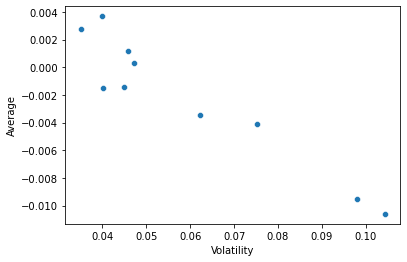

In [83]:
plot = sns.scatterplot(df['Volatility'], df['Average'])
plt.show()

There are stocks which gives high returns on the top left cornor of the plot which also has very low volatility.
On the Right cornor there are stocks which give low returns and high volatility.
There are two stocks in between which needs to be carefully analaysed as in this case the stocks might be in earge of moving up which give high returns or might have been in decline where most of customers have already sold their stocks which mean its volatility is high and returns will be low.

In [84]:
#PART B: Conclusions and Recommendations

1) Initially we have drawn a plot for couple of stocks such as Infosys and SAIL for the last six years of given data set, from which we came to a conclusion that the price amount of Infosys stocks were moving on the upward direction but where as for SAIl it has gone down hence by this scenario one cannot predict that the Infosys stocks yeild higher returns compared to that of SAIL.
2) Hean we have derived Average returns and Standard Deviation for all the stocks and stored in a data frame format.
3) From this data frame we could suggest our client or one get an idea of how much the returns will be each stock and its volatility.
4) Ideally higher returns and lower volatility is the prefered stock.
5) In this perspective stocks such as 'ShreeCement', 'Infosys' has higher returns and lower volatility.
6) Stocks like Mahindra&Mahindra, SAIL, SunPharma, JindalSteel, IdeaVodafone, JetAirways all of these stock show negative returns.
8) Stocks such as IndianHotel and AxisBank give us positive returns but there volatility is high.
7)To conclude by using simple mean and standard deviation we can make some wise choises by predicting the right stocks.